# Imports

In [1407]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [1408]:
df = pd.read_csv('train.csv')
pd.reset_option('display.max_columns')

In [1409]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1410]:
print(df.shape)
print(df.isnull().sum())

(8693, 14)
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [1411]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [1412]:
df.groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


In [1413]:
# Loop through the selected columns and print unique values with counts
for column in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination']:
    print(f"Unique values and their counts in column '{column}':")
    print(df[column].value_counts(dropna=False))  # Include NaN in counts
    print()  # Blank line for better readability


Unique values and their counts in column 'HomePlanet':
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

Unique values and their counts in column 'CryoSleep':
False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

Unique values and their counts in column 'Cabin':
NaN        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64

Unique values and their counts in column 'Destination':
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64



# Handle Missing Values

In [1414]:
df.drop(columns=['Name'], inplace=True)

In [1415]:
# Fill categorical columns with mode
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df['CryoSleep'].fillna(False, inplace=True)  # Assuming missing means not in cryosleep
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['VIP'].fillna(False, inplace=True)  # Assuming missing means not a VIP

In [1416]:
# Fill numerical columns with median or mean
df['Age'].fillna(df['Age'].median(), inplace=True)
# df['RoomService'].fillna(0, inplace=True)
# df['FoodCourt'].fillna(0, inplace=True)
# df['ShoppingMall'].fillna(0, inplace=True)
# df['Spa'].fillna(0, inplace=True)
# df['VRDeck'].fillna(0, inplace=True)

In [1417]:
print(df.isnull().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


In [1418]:
df.shape
df.dropna(inplace=True)

# Visualize and Transform

In [1419]:
df.groupby('Transported').mean()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,,,
False,0.126850,29.981501,0.028805,384.117865,382.40037,167.956395,567.801797,531.864165
True,0.558785,27.727677,0.017020,63.554334,555.94894,179.569259,62.189055,70.167845


# Split Columns

In [1420]:
# Split the 'Cabin' column into 'Deck', 'Num', and 'Side'
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

# Convert 'Num' to numeric for further processing
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')

In [1421]:
# Split 'PassengerId' into 'GroupId' and 'PassengerNum'
df[['GroupId', 'PassengerNum']] = df['PassengerId'].str.split('_', expand=True)

# Convert the new columns to integer type for numerical analysis
df['GroupId'] = df['GroupId'].astype(int)
df['PassengerNum'] = df['PassengerNum'].astype(int)

In [1422]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,GroupId,PassengerNum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,4,1


In [1423]:
# Loop through the selected columns and print unique values with counts
for column in ['Deck', 'Num', 'Side']:
    print(f"Unique values and their counts in column '{column}':")
    print(df[column].value_counts(dropna=False))  # Include NaN in counts
    print()  # Blank line for better readability

Unique values and their counts in column 'Deck':
F    2489
G    2274
E     797
B     708
C     668
D     425
A     238
T       4
Name: Deck, dtype: int64

Unique values and their counts in column 'Num':
82      24
19      22
97      21
56      20
176     20
        ..
1036     1
1116     1
1538     1
1536     1
1527     1
Name: Num, Length: 1784, dtype: int64

Unique values and their counts in column 'Side':
S    3857
P    3746
Name: Side, dtype: int64



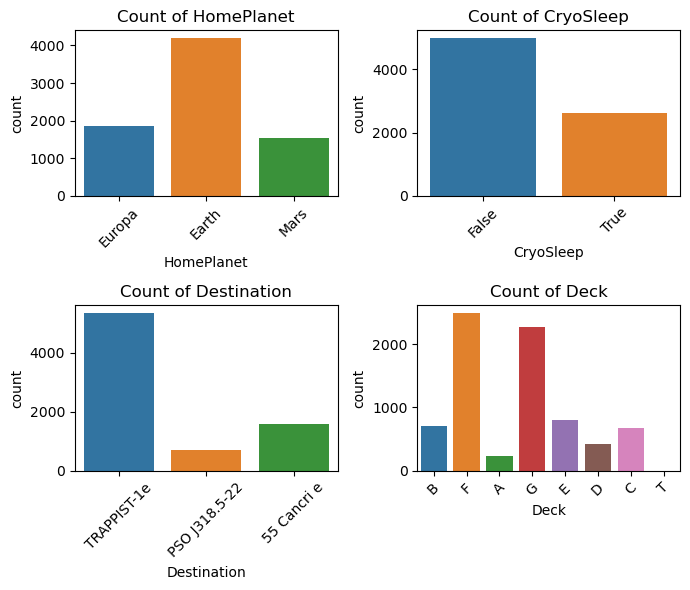

In [1424]:
# Define categorical columns to plot
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Deck']

# Create a 2x2 grid of subplots (adjust number of rows and columns as needed)
fig, axes = plt.subplots(2, 2, figsize=(7, 6))  # Adjust figure size accordingly

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through columns and plot count plots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])  # Plot on specific axes
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

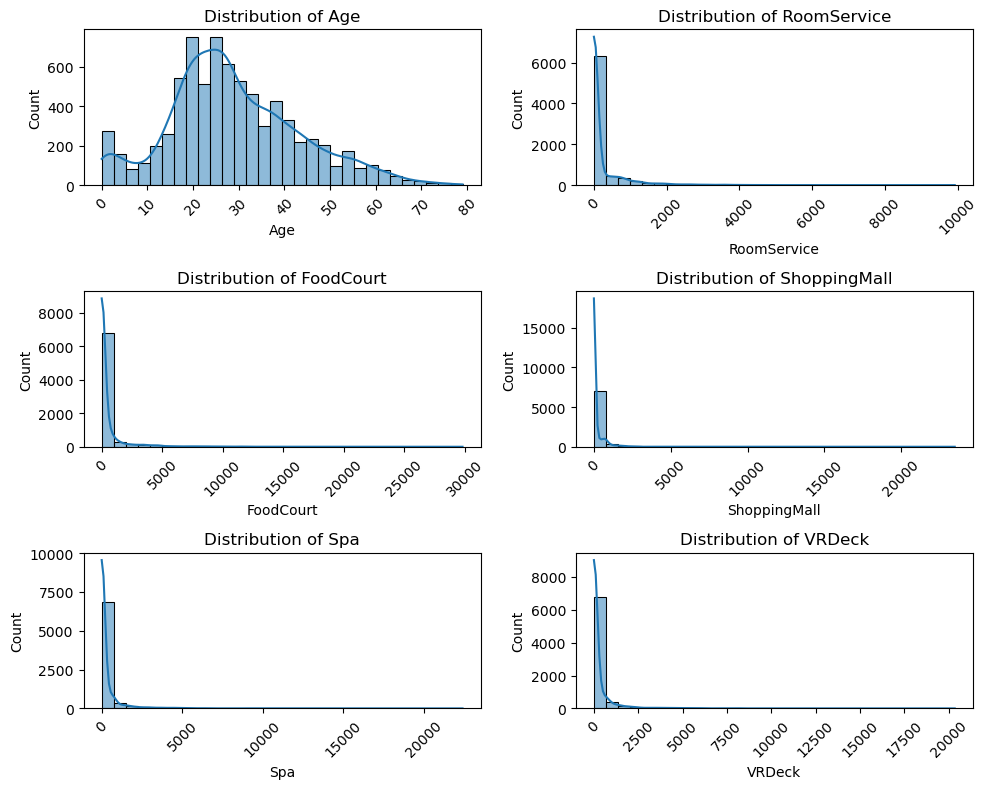

In [1425]:
# Define numerical columns to plot
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Create a 3x2 grid of subplots (to fit 6 plots)
fig, axes = plt.subplots(3, 2, figsize=(10, 8))  # Adjust figure size accordingly

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through columns and plot histograms with KDE
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])  # Plot on specific axes
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

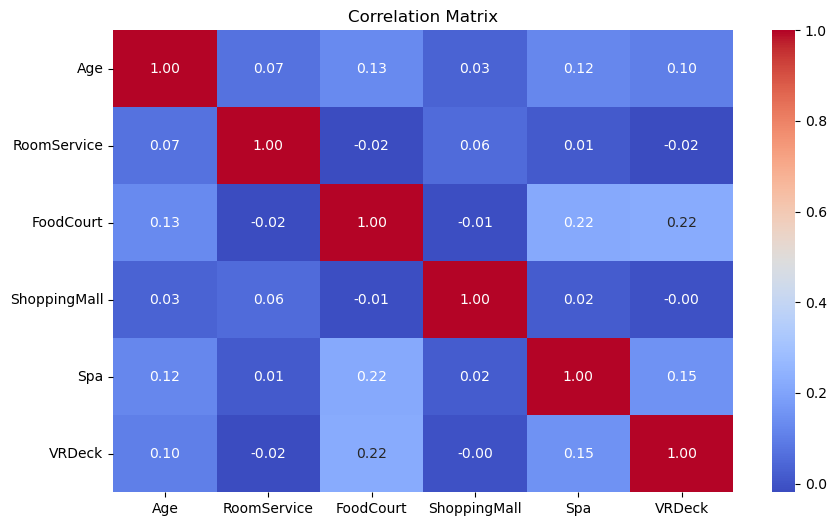

In [1426]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Drop Some Columns

In [1427]:
df.drop(columns=['PassengerId', 'Cabin'], inplace=True) 
# We have split these columns already

In [1428]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,GroupId,PassengerNum
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,2,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,3,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,3,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,4,1


# One-Hot Encoding

In [1429]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)

# Check the resulting DataFrame
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,...,0,1,1,0,0,0,0,0,0,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,...,0,1,0,0,0,0,1,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,1,0,0,0,0,0,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,1,0,0,0,0,0,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,...,0,1,0,0,0,0,1,0,0,1


# Create new column

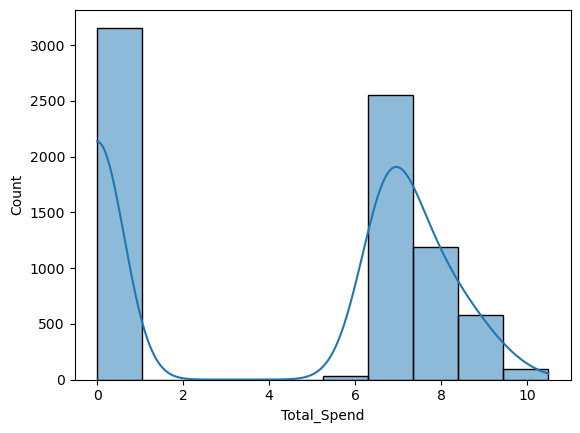

In [1430]:
# Create Total_Spend column
df['Total_Spend'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
df['Total_Spend'] = np.log1p(df['Total_Spend'])
# Plot histogram with KDE
sns.histplot(df['Total_Spend'], kde=True, bins=10)

# Show plot
plt.show()

In [1431]:
df.shape

(7603, 25)

# Seperate features, target and split train and test

In [1432]:
# Separate features and target
X = df.drop('Transported', axis=1)
y = df['Transported'].astype(int)  # Convert True/False to 1/0 if needed
X[['CryoSleep', 'VIP']] = df[['CryoSleep', 'VIP']].astype(int)

In [1459]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

# Check the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6082, 24) (1521, 24) (6082,) (1521,)


# Scale Data

In [1460]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Models

In [1461]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [1462]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Test accuracy: 0.7804076265614727
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       757
           1       0.77      0.80      0.79       764

    accuracy                           0.78      1521
   macro avg       0.78      0.78      0.78      1521
weighted avg       0.78      0.78      0.78      1521



In [1463]:
# Predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [1464]:
# Accuracy for train and test
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7966129562643867


In [1465]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_test_rf_pred = rf_model.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_rf_pred))

Random Forest Test Accuracy: 0.7836949375410914


In [1466]:
import xgboost as xgb
from sklearn.svm import SVC

In [1467]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [1468]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print("="*50)

Model: Logistic Regression
Accuracy: 0.7804
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       757
           1       0.77      0.80      0.79       764

    accuracy                           0.78      1521
   macro avg       0.78      0.78      0.78      1521
weighted avg       0.78      0.78      0.78      1521

Model: Random Forest
Accuracy: 0.7837
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       757
           1       0.80      0.75      0.78       764

    accuracy                           0.78      1521
   macro avg       0.78      0.78      0.78      1521
weighted avg       0.78      0.78      0.78      1521

Model: SVM
Accuracy: 0.7975
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       757
           1       0.80      0.80      0.80       764

   

C:\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.7916
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       757
           1       0.80      0.79      0.79       764

    accuracy                           0.79      1521
   macro avg       0.79      0.79      0.79      1521
weighted avg       0.79      0.79      0.79      1521



In [1469]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=3000, depth=6, learning_rate=0.1, verbose=500)

# Fit the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Test Accuracy: {accuracy_catboost}")
print(classification_report(y_test, y_pred_catboost))


0:	learn: 0.6495263	total: 4.29ms	remaining: 12.9s
500:	learn: 0.1796611	total: 1.91s	remaining: 9.52s
1000:	learn: 0.1104724	total: 3.84s	remaining: 7.66s
1500:	learn: 0.0757308	total: 5.74s	remaining: 5.74s
2000:	learn: 0.0545126	total: 7.66s	remaining: 3.82s
2500:	learn: 0.0408598	total: 9.58s	remaining: 1.91s
2999:	learn: 0.0320216	total: 11.5s	remaining: 0us
CatBoost Test Accuracy: 0.7942143326758712
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       757
           1       0.80      0.78      0.79       764

    accuracy                           0.79      1521
   macro avg       0.79      0.79      0.79      1521
weighted avg       0.79      0.79      0.79      1521



In [1470]:
import lightgbm as lgb

# Initialize LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=10)

# Fit the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Test Accuracy: {accuracy_lgb}")
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 3055, number of negative: 3027
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 6082, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502302 -> initscore=0.009208
[LightGBM] [Info] Start training from score 0.009208
LightGBM Test Accuracy: 0.8152531229454306
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       757
           1       0.82      0.82      0.82       764

    accuracy                           0.82      1521
   macro avg       0.82      0.82      0.82      1521
weighted avg       0.82      0.82      0.82      1521



In [1471]:
# #Train with full data
# X = scaler.transform(X)
# #Initialize LightGBM
# lgb_model_full = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, lambda_l1=0.1, lambda_l2=1)

# # Fit the model
# lgb_model_full.fit(X, y)

# # Make predictions on the test set
# y_pred_lgb = lgb_model_full.predict(X_test)

# # Evaluate the model
# accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
# print(f"LightGBM Test Accuracy: {accuracy_lgb}")
# print(classification_report(y_test, y_pred_lgb))

In [1472]:
test_data = pd.read_csv('test.csv')

In [1473]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [1474]:
test_data.shape

(4277, 13)

In [1475]:
passenger_id = test_data['PassengerId']

In [1476]:
y.value_counts()

1    3819
0    3784
Name: Transported, dtype: int64

In [1477]:

def preprocess_and_predict(test_df, lgb_model, scaler):
    # Drop 'Name' column (if exists)
    if 'Name' in test_df.columns:
        test_df.drop(columns=['Name'], inplace=True)
    
    # Fill missing values for categorical columns with the most frequent value (mode)
    test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0], inplace=True)
    test_df['Destination'].fillna(test_df['Destination'].mode()[0], inplace=True)
    test_df['CryoSleep'].fillna(False, inplace=True)  # Assuming missing means not in cryosleep
    test_df['VIP'].fillna(False, inplace=True)  # Assuming missing means not a VIP
    
    # Fill missing values for numerical columns (RoomService, FoodCourt, etc.) with 0
    test_df['RoomService'].fillna(0, inplace=True)
    test_df['FoodCourt'].fillna(0, inplace=True)
    test_df['ShoppingMall'].fillna(0, inplace=True)
    test_df['Spa'].fillna(0, inplace=True)
    test_df['VRDeck'].fillna(0, inplace=True)
    
    # Fill missing 'Age' with the median value
    test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
    
    # Split the 'Cabin' column into 'Deck', 'Num', and 'Side'
    test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
    
    # Fill missing values in the 'Deck' and 'Side' columns with the most frequent value (mode)
    test_df['Deck'].fillna(test_df['Deck'].mode()[0], inplace=True)
    test_df['Side'].fillna(test_df['Side'].mode()[0], inplace=True)
    
    # Fill missing values in the 'Num' column with the median value
    test_df['Num'] = pd.to_numeric(test_df['Num'], errors='coerce')  # Convert to numeric
    test_df['Num'].fillna(test_df['Num'].median(), inplace=True)  # Filling with the median
    
    # Split 'PassengerId' into 'GroupId' and 'PassengerNum'
    test_df[['GroupId', 'PassengerNum']] = test_df['PassengerId'].str.split('_', expand=True)
    test_df['GroupId'] = test_df['GroupId'].astype(int)
    test_df['PassengerNum'] = test_df['PassengerNum'].astype(int)
    
    # Drop 'PassengerId' and 'Cabin' columns (as they are not useful for prediction now)
    test_df.drop(columns=['PassengerId', 'Cabin'], inplace=True)
    
    # One-hot encode categorical columns (this should match the training data transformation)
    test_df = pd.get_dummies(test_df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)
    
    # Create Total_Spend column (similar to the training transformation)
    test_df['Total_Spend'] = test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    test_df['Total_Spend'] = np.log1p(test_df['Total_Spend'])  # Apply log transformation
    
    # Apply the same scaling as done in the training data (using the scaler fit during training)
    test_df_scaled = scaler.transform(test_df)
    
    # Make predictions with the trained model
    y_pred_test = lgb_model.predict(test_df_scaled)
    
    # Optionally, if you want to output the predictions in a CSV or see them
    test_df['Prediction'] = y_pred_test
    
    return test_df[['Prediction']]

# Example usage
# Assuming test_data is your input DataFrame, lgb_model is your trained LightGBM model, 
# and scaler is the StandardScaler used during training
predictions = preprocess_and_predict(test_data, lgb_model, scaler)

# To save predictions to a CSV
# predictions.to_csv('predictions3.csv', index=False)


In [1478]:
predictions

,Prediction
0,0
1,0
2,1
3,1
4,1
...,...
4272,1
4273,0
4274,1
4275,1


In [1479]:
predictions.value_counts()

Prediction
1             2167
0             2110
dtype: int64

In [1480]:
# Predictions is a DataFrame with shape (4277, 1)
# Convert predictions to a NumPy array and flatten it
predictions_flat = predictions.values.flatten()

# Convert the predictions from 0/1 to True/False
predictions_boolean = ['True' if x == 1 else 'False' for x in predictions_flat]

# Create a DataFrame with 'PassengerId' and 'Transported'
result_df = pd.DataFrame({
    'PassengerId': passenger_id,  # Assuming 'passenger_id' is already extracted
    'Transported': predictions_boolean
})

# Display the result
print(result_df)

# Optionally, save the result to a CSV file
# result_df.to_csv('predictions.csv', index=False)


     PassengerId Transported
0        0013_01       False
1        0018_01       False
2        0019_01        True
3        0021_01        True
4        0023_01        True
...          ...         ...
4272     9266_02        True
4273     9269_01       False
4274     9271_01        True
4275     9273_01        True
4276     9277_01        True

[4277 rows x 2 columns]


In [1481]:
# result_df.to_csv('full_trained.csv', index=False)

In [1482]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   object
dtypes: object(2)
memory usage: 67.0+ KB


In [1483]:
# result_df.to_csv('submission_final.csv', index=False)